In [1]:
import os
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

### Make a normalized scalar object

In [2]:
file_paths = [f'training/{_}.csv' for _ in range(1, 290 + 1)]
file_paths[:5]

['training/1.csv',
 'training/2.csv',
 'training/3.csv',
 'training/4.csv',
 'training/5.csv']

In [3]:
data = pd.read_csv(file_paths[0],)
numeric_columns = data.columns.tolist()[3:]
X = data[numeric_columns].to_numpy()
X.shape

(8766, 86)

In [4]:
data.columns

Index(['LSU_id', 'date', 'split', 'log10_sedyld', 'min_temperature', 'rh',
       'wnd', 'slr', 'sinT', 'cosT', 'day_of_week', 'day_of_month',
       'day_of_year', 'week_of_year', 'month_of_year', 'day_of_week_sin',
       'day_of_week_cos', 'day_of_month_sin', 'day_of_month_cos',
       'day_of_year_sin', 'day_of_year_cos', 'week_of_year_sin',
       'week_of_year_cos', 'month_of_year_sin', 'month_of_year_cos', 'area',
       'slope', 'len1', 'csl', 'wid1', 'dep1', 'elev', 'clay', 'silt', 'sand',
       'AGRL', 'WETW', 'URLD', 'URMD', 'URHD', 'UIDU', 'BARN', 'FRSD', 'FRSE',
       'FRST', 'SHRB', 'RNGE', 'PAST', 'WEWO', 'WEHB', 'CC', 'CCS', 'CS',
       'CSS', 'CSW', 'CWC', 'SCC', 'SC', 'SSC', 'SS', 'SSW', 'SWC', 'SWS',
       'WCC', 'WCS', 'WSC', 'WSS', 'WSW', 'AGRL_TD', 'CC_TD', 'CCS_TD',
       'CS_TD', 'CSS_TD', 'CSW_TD', 'CWC_TD', 'SCC_TD', 'SC_TD', 'SSC_TD',
       'SS_TD', 'SSW_TD', 'SWC_TD', 'SWS_TD', 'WCC_TD', 'WCS_TD', 'WSC_TD',
       'WSS_TD', 'WSW_TD', 'log10_pcp', 'max_

In [5]:
data.head()

,LSU_id,date,split,log10_sedyld,min_temperature,rh,wnd,slr,sinT,cosT,...,SSW_TD,SWC_TD,SWS_TD,WCC_TD,WCS_TD,WSC_TD,WSS_TD,WSW_TD,log10_pcp,max_temperature
0,1,1992-01-01,0,-14.301030,-5.55,0.7970,2.4,7.86240,-0.001376,0.999999,...,-0.142913,-0.394227,-0.494311,-3.033285,0.286944,-2.185987,-0.996403,0.04249,-0.643621,-1.35
1,1,1992-01-02,0,-14.301030,-7.15,0.8115,1.9,8.40672,0.015826,0.999875,...,-0.142913,-0.394227,-0.494311,-3.033285,0.286944,-2.185987,-0.996403,0.04249,-0.643621,0.95
2,1,1992-01-03,0,-5.177832,-3.25,0.8225,3.2,3.69792,0.033023,0.999455,...,-0.142913,-0.394227,-0.494311,-3.033285,0.286944,-2.185987,-0.996403,0.04249,-0.643621,2.85
3,1,1992-01-04,0,-2.350665,0.05,0.8665,2.1,2.17728,0.050210,0.998739,...,-0.142913,-0.394227,-0.494311,-3.033285,0.286944,-2.185987,-0.996403,0.04249,0.515236,3.15
4,1,1992-01-05,0,-2.709965,-1.75,0.7975,2.9,7.94016,0.067382,0.997727,...,-0.142913,-0.394227,-0.494311,-3.033285,0.286944,-2.185987,-0.996403,0.04249,0.353952,6.45


In [6]:
scaler = StandardScaler()

for i, file_path in enumerate(file_paths):
    if (i % 50) == 0:
        print(file_path)
    try:
        data = pd.read_csv(file_path)
        numeric_columns = data.columns.tolist()[3:]
        X = data[numeric_columns].to_numpy()
        scaler.partial_fit(X)
    except Exception as e:
            print(f'Error processing {file_path}: {e}')

training/1.csv
training/51.csv
training/101.csv
training/151.csv
training/201.csv
training/251.csv


In [7]:
# --- Step 2.5: Save the fitted scaler ---
scaler_filename = 'standard_scaler.joblib'
joblib.dump(scaler, scaler_filename)

['standard_scaler.joblib']

### Verify that the scalar works

In [8]:
data = pd.read_csv('testing/1.csv',)
numeric_columns = data.columns.tolist()[3:]
X = data[numeric_columns].to_numpy()
X.shape

(2192, 86)

In [9]:
loaded_scaler = joblib.load(scaler_filename)

In [10]:
scaled_data = scaler.transform(X)
scaled_data2 = loaded_scaler.transform(X)

In [11]:
import matplotlib.pyplot as plt

(array([781.,   7.,  28.,  81.,  23., 254., 170.,  24.,  23.,  26.,  22.,
         33.,  35.,  31.,  49.,  41.,  40.,  38.,  39.,  42.,  68.,  65.,
         34.,  44.,  24.,  33.,  51.,  39.,  33.,  14.]),
 array([-0.5567095 , -0.43828284, -0.31985617, -0.2014295 , -0.08300284,
         0.03542383,  0.1538505 ,  0.27227716,  0.39070383,  0.5091305 ,
         0.62755716,  0.74598383,  0.8644105 ,  0.98283716,  1.10126383,
         1.2196905 ,  1.33811716,  1.45654383,  1.5749705 ,  1.69339716,
         1.81182383,  1.9302505 ,  2.04867716,  2.16710383,  2.2855305 ,
         2.40395716,  2.52238383,  2.6408105 ,  2.75923716,  2.87766383,
         2.9960905 ]),
 <BarContainer object of 30 artists>)

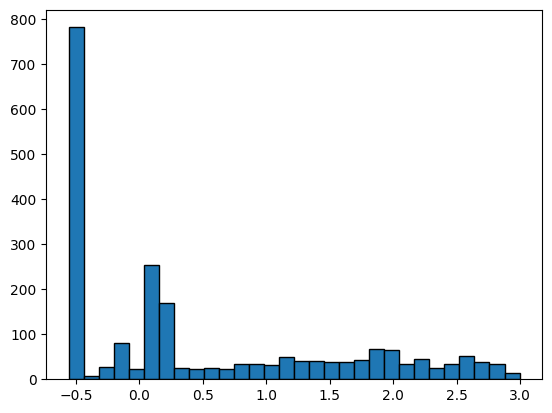

In [14]:
plt.hist(scaled_data[:,0],30,edgecolor='k')

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0., 2192.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.]),
 array([0.24330036, 0.2766337 , 0.30996703, 0.34330036, 0.3766337 ,
        0.40996703, 0.44330036, 0.4766337 , 0.50996703, 0.54330036,
        0.5766337 , 0.60996703, 0.64330036, 0.6766337 , 0.70996703,
        0.74330036, 0.7766337 , 0.80996703, 0.84330036, 0.8766337 ,
        0.90996703, 0.94330036, 0.9766337 , 1.00996703, 1.04330036,
        1.0766337 , 1.10996703, 1.14330036, 1.1766337 , 1.20996703,
        1.24330036]),
 <BarContainer object of 30 artists>)

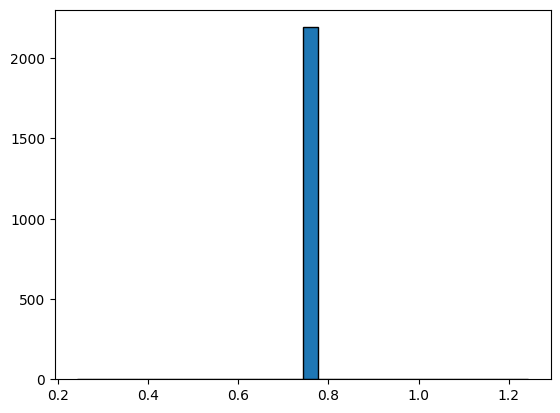

In [21]:
plt.hist(X[:,50],30,edgecolor='k')

In [12]:
X.shape

(2192, 69)

In [13]:
import torch

In [14]:
Z = torch.load('training/X.pt')
Z.shape

torch.Size([6960, 360, 68])